#helper functions!

num_of_tests = 10


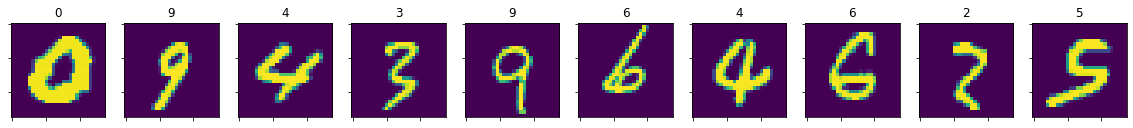

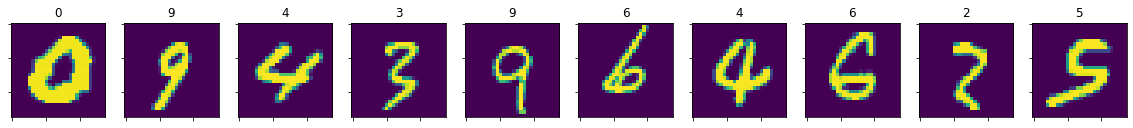

In [3]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import  torch

def show_images_return_from_testing(count_of_images):
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')

    for indx in range(num_of_tests):
        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(int(labels[indx]))

    for indx in range(num_of_tests):
        axs2[indx].set_yticklabels([])  # x-axis
        axs2[indx].set_xticklabels([])  # y-axis
        axs2[indx].imshow(testing_images[indx, 0, :, :])
        axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_from_testing(10)
_, _ = show_images_return_from_testing(10)


num_of_tests = 10
torch.Size([10, 10])
tensor([[-1.2295e+01, -5.7600e+00,  3.4887e+00,  1.9191e+01, -7.6194e+00,
          5.8562e+00, -1.1906e+01, -6.4327e+00,  4.5452e+00,  4.4994e+00],
        [-9.0412e+00,  1.3431e+01,  1.2851e+00, -5.6214e-01, -1.0520e+00,
         -2.1034e+00, -7.2351e+00, -3.3038e+00,  2.8851e+00, -2.2344e+00],
        [-1.3729e+01, -1.3378e+01, -6.4474e+00,  1.0774e+01, -1.4369e+00,
          7.9562e+00, -2.1454e+01,  2.3373e+00,  8.0164e+00,  1.6455e+01],
        [-9.7716e+00, -2.2626e+00, -3.0271e+00,  2.0888e+01, -1.0056e+01,
          1.3421e+01, -4.4707e+00, -1.5375e+01,  9.8385e-01,  4.8926e+00],
        [-1.1573e+01, -1.3142e+01, -4.8584e+00,  9.1940e+00,  1.0787e+00,
          4.2907e-01, -1.6840e+01,  3.8051e+00,  3.8286e+00,  1.9255e+01],
        [-1.0206e+01, -5.1205e+00, -7.4078e+00, -2.1281e+00,  1.4197e+01,
          7.8169e-01, -6.5451e+00,  1.0326e+00,  1.0458e-01,  6.0855e+00],
        [ 9.5367e-01,  9.8599e-01,  2.3578e+01, -9.0576e-01, -1.469

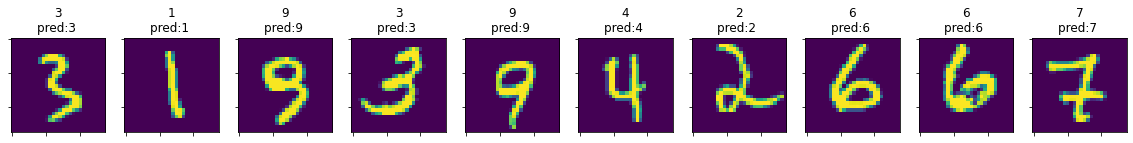

In [1]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from VAE import AE2
from VAE import AE
from model import MyModel5

# PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'
#
# model_vae = AE()
# model_vae.load_state_dict(torch.load(PATH_VAE))
# model_vae.eval()

PATH_weight_classify = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_model_classifier'
model_classify = MyModel5()
model_classify.load_state_dict(torch.load(PATH_weight_classify))
model_classify.eval()

def show_images_with_model(count_of_images=5, model=model_classify):
    model.eval()
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    # fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')
    PRED_bool = True
    if PRED_bool :
            pred = model(testing_images)
            print(pred.shape)
            print(pred)
    for indx in range(num_of_tests):
        title = str(int(labels[indx]))+'\npred:'
        if PRED_bool :
            pred_acc = pred[indx]
            pred_nr = int(pred_acc.argmax())
            acc = pred_acc[pred_nr]
            title += str(pred_nr) +' '
            # title += str(int(acc)) # TODO add later as accuracy

        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(title)
        # axs[indx].set_title(int(labels[indx]))

    # for indx in range(num_of_tests):
    #     axs2[indx].set_yticklabels([])  # x-axis
    #     axs2[indx].set_xticklabels([])  # y-axis
    #     pred = model(testing_images[indx, 0, :, :])
    #     axs2[indx].imshow(pred)
    #     # axs2[indx].imshow(testing_images[indx, 0, :, :])
    #     axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_return_from_testing(10)
# _, _ = show_images_return_from_testing(10)
_, _ = show_images_with_model(10)


Programm

num_of_tests = 10
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.000

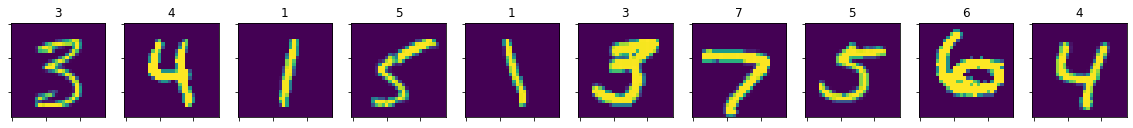

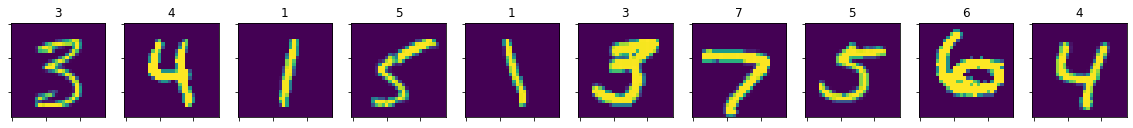

In [5]:
import torch
from VAE import VAE
from VAE import AE_relu
# from VAE import VAE

PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'

model_vae = AE_relu()
model_vae.load_state_dict(torch.load(PATH_VAE))
model_vae.eval()
testing_images, labels = show_images_return_from_testing(10)
print(testing_images[0])
testing_images = testing_images /255
#TODO Preproccesing for images needed !!!
print(testing_images[0])
enc = model_vae.encoder(testing_images[0])
dec = model_vae.decoder(enc)
print(f'{enc.shape= }')
print(f'{enc = }')
print(f'{dec.shape  = }')
print(f'{dec  = }')

num_of_tests = 10


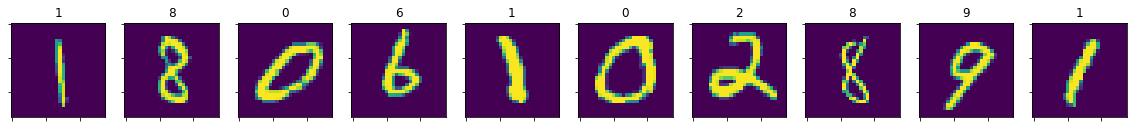

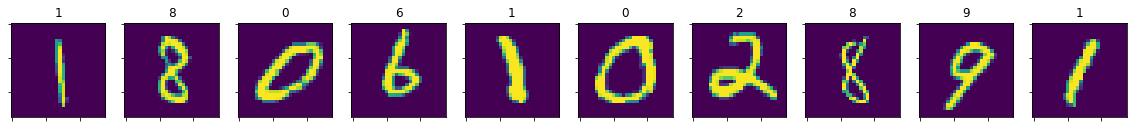

In [282]:
# show_images_return_from_testing
testing_images, labels = show_images_return_from_testing(10)

x = model_vae(testing_images[0])